## Data exploration
* Perry Huang liwanh2@illinois.edu
* Yiqiu Song yiqius3@illinois.edu

## Milestone 2 - Data exploration

In [ ]:
import re
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pandas as pd
import re


Import the data processed after Milestone 1

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
df = pd.read_pickle("/content/drive/MyDrive/Deep Dive 12/ppd/final_dataset.pkl.gz")


Mounted at /content/drive






```

Convert selected columns to string dtype and strip whitespace

In [ ]:
for c in ['saon','paon','street','town','district','county','postcode',
          'property_type','new_build','tenure','transaction_category']:
    if c in df.columns:
        df[c] = df[c].astype('string').str.strip()


Add month and season varaible which we may need in the feature

In [ ]:
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['month_sin'] = np.sin(2*np.pi*(df['month']/12.0))
df['month_cos'] = np.cos(2*np.pi*(df['month']/12.0))

Postcode and building name cleaning

In [ ]:

def fix_postcode(pc):
    if pd.isna(pc): return pc
    s = re.sub(r'\s+', '', pc.upper())
    if len(s) > 3: s = s[:-3] + ' ' + s[-3:]
    return s
df['postcode'] = df['postcode'].apply(fix_postcode)
df['postcode_outward'] = df['postcode'].astype('string').str.split().str[0]
df['postcode_sector']  = (
    df['postcode'].astype('string')
      .str.replace(r'\s+', ' ', regex=True).str.strip()
      .str.replace(' ', '', regex=False)
      .str.replace(r'([A-Z]\d?[A-Z]?)$', r' \1', regex=True)
)
# sector = outward + first digit of inward
df['postcode_sector'] = df['postcode'].astype('string').str.extract(r'^([A-Z]{1,2}\d[A-Z0-9]?)\s?\d')[0]


Building name = soan + poan

In [ ]:
def merge_building_name(saon, paon):
    if pd.notna(saon) and saon.strip():
        return saon.strip().title()
    if pd.notna(paon) and str(paon).strip():
        return str(paon).strip().title()
    return np.nan
df['building_name'] = df.apply(lambda r: merge_building_name(r['saon'], r['paon']), axis=1)
df['building_name'] = df['building_name'].str.replace(r'\s*,\s*', ', ', regex=True).str.strip()


We extract the columns we need

In [ ]:

dataset = df.copy()
dataset.head()


,unique_id,price_paid,date,postcode,property_type,new_build,tenure,saon,paon,street,...,Year,district_key,area_key,Population,Live_Births,Median_Annual_Earnings,Inactivity_Rate_Percent,HP_Residence_Ratio,HP_Workplace_Ratio,building_name
0,25EA59F9-A161-4D50-E050-A8C0630562D0,455000,2015-10-23,E1 0AE,F,N,L,<NA>,338,CABLE STREET,...,2015,TOWER HAMLETS,TOWER HAMLETS,282674.0,1157.7775,46681.0,22.6,11.89,8.78,338
1,BA8840F9-5801-45B5-B164-963078664015,378000,2015-08-25,E1 0AE,F,N,L,<NA>,362,CABLE STREET,...,2015,TOWER HAMLETS,TOWER HAMLETS,282674.0,1157.7775,46681.0,22.6,11.89,8.78,362
2,23B6165D-D01F-FCF4-E050-A8C0620577FA,450000,2015-06-18,E1 0AH,F,N,L,LOWER GROUND AND GROUND FLOOR FLAT,387,CABLE STREET,...,2015,TOWER HAMLETS,TOWER HAMLETS,282674.0,1157.7775,46681.0,22.6,11.89,8.78,Lower Ground And Ground Floor Flat
3,25EA59F9-A320-4D50-E050-A8C0630562D0,225000,2015-10-02,E1 0AN,F,N,L,FLAT 10,KNOWLDEN HOUSE,CABLE STREET,...,2015,TOWER HAMLETS,TOWER HAMLETS,282674.0,1157.7775,46681.0,22.6,11.89,8.78,Flat 10
4,288DCE29-01AE-E510-E050-A8C06205480E,340000,2015-10-30,E1 0AP,F,N,L,FLAT 25,THORNEWILL HOUSE,CABLE STREET,...,2015,TOWER HAMLETS,TOWER HAMLETS,282674.0,1157.7775,46681.0,22.6,11.89,8.78,Flat 25


Finding the missing values

In [ ]:
na_table = (
    dataset.isna().sum().to_frame("Missing Count")
    .assign(Total=len(dataset))
    .assign(Missing_Pct=lambda x: (x["Missing Count"] / x["Total"] * 100).round(2))
    .sort_values("Missing_Pct", ascending=False)
)
na_table

,Missing Count,Total,Missing_Pct
locality,654030,693055,94.37
saon,349516,693055,50.43
postcode,3032,693055,0.44
postcode_sector,3032,693055,0.44
join_key,3032,693055,0.44
postcode_outward,3032,693055,0.44
street,122,693055,0.02
date,0,693055,0.00
price_paid,0,693055,0.00
unique_id,0,693055,0.00


The missing value is less than 5%, so we just drop them

In [ ]:
dataset = dataset.dropna(subset=['postcode', 'street']).copy()
(dataset.isna().sum() / len(df) * 100).round(3)


,0
unique_id,0.000
price_paid,0.000
date,0.000
postcode,0.000
property_type,0.000
new_build,0.000
tenure,0.000
saon,50.260
paon,0.000
street,0.000


In [ ]:
display(dataset['county'].value_counts())

,count
county,
GREATER LONDON,689985


In [ ]:
dataset['district'].value_counts()

,count
district,
WANDSWORTH,60635
LAMBETH,45020
TOWER HAMLETS,44784
SOUTHWARK,39458
GREENWICH,39004
LEWISHAM,38545
BARNET,37980
CITY OF WESTMINSTER,36089
WALTHAM FOREST,34257


In [ ]:
dataset.columns

Index(['unique_id', 'price_paid', 'date', 'postcode', 'property_type',
       'new_build', 'tenure', 'saon', 'paon', 'street', 'locality', 'town',
       'district', 'county', 'transaction_category', 'linked_data_uri', 'year',
       'month', 'month_sin', 'month_cos', 'postcode_outward',
       'postcode_sector', 'join_key', 'avg_area', 'avg_rooms', 'Year',
       'district_key', 'area_key', 'Population', 'Live_Births',
       'Median_Annual_Earnings', 'Inactivity_Rate_Percent',
       'HP_Residence_Ratio', 'HP_Workplace_Ratio', 'building_name'],
      dtype='object')

1. Data Visulization


Recap the data and do the visulization



In [ ]:
dataset

,unique_id,price_paid,date,postcode,property_type,new_build,tenure,saon,paon,street,...,Year,district_key,area_key,Population,Live_Births,Median_Annual_Earnings,Inactivity_Rate_Percent,HP_Residence_Ratio,HP_Workplace_Ratio,building_name
0,25EA59F9-A161-4D50-E050-A8C0630562D0,455000,2015-10-23,E1 0AE,F,N,L,<NA>,338,CABLE STREET,...,2015,TOWER HAMLETS,TOWER HAMLETS,282674.0,1157.7775,46681.0,22.6,11.89,8.78,338
1,BA8840F9-5801-45B5-B164-963078664015,378000,2015-08-25,E1 0AE,F,N,L,<NA>,362,CABLE STREET,...,2015,TOWER HAMLETS,TOWER HAMLETS,282674.0,1157.7775,46681.0,22.6,11.89,8.78,362
2,23B6165D-D01F-FCF4-E050-A8C0620577FA,450000,2015-06-18,E1 0AH,F,N,L,LOWER GROUND AND GROUND FLOOR FLAT,387,CABLE STREET,...,2015,TOWER HAMLETS,TOWER HAMLETS,282674.0,1157.7775,46681.0,22.6,11.89,8.78,Lower Ground And Ground Floor Flat
3,25EA59F9-A320-4D50-E050-A8C0630562D0,225000,2015-10-02,E1 0AN,F,N,L,FLAT 10,KNOWLDEN HOUSE,CABLE STREET,...,2015,TOWER HAMLETS,TOWER HAMLETS,282674.0,1157.7775,46681.0,22.6,11.89,8.78,Flat 10
4,288DCE29-01AE-E510-E050-A8C06205480E,340000,2015-10-30,E1 0AP,F,N,L,FLAT 25,THORNEWILL HOUSE,CABLE STREET,...,2015,TOWER HAMLETS,TOWER HAMLETS,282674.0,1157.7775,46681.0,22.6,11.89,8.78,Flat 25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
692920,2859C1AC-3EEF-52B4-E063-4804A8C05948,2350000,2024-01-24,WC2R 1AB,F,N,L,APARTMENT 35,"WREN HOUSE, 190",STRAND,...,2024,CITY OF WESTMINSTER,CITY OF WESTMINSTER,209996.0,491.3750,51815.0,23.1,18.31,18.04,Apartment 35
692921,38EDC0C2-9AF6-0F63-E063-4704A8C00424,2100000,2024-06-04,WC2R 1BE,F,N,L,<NA>,227 - 228,STRAND,...,2024,CITY OF WESTMINSTER,CITY OF WESTMINSTER,209996.0,491.3750,51815.0,23.1,18.31,18.04,227 - 228
692922,2D4D7609-DF4C-BDF9-E063-4804A8C0672F,3715000,2024-05-03,WC2R 1HL,O,N,F,<NA>,151,STRAND,...,2024,CITY OF WESTMINSTER,CITY OF WESTMINSTER,209996.0,491.3750,51815.0,23.1,18.31,18.04,151
692923,3B5CE842-7F15-EE3A-E063-4804A8C0D6F1,12379200,2024-08-06,WC2R 2PG,O,N,L,<NA>,"GLOBE HOUSE, 4",TEMPLE PLACE,...,2024,CITY OF WESTMINSTER,CITY OF WESTMINSTER,209996.0,491.3750,51815.0,23.1,18.31,18.04,"Globe House, 4"


## The following cells contain visualizations to explore the data distribution  


The first plot ("the distribution of property prices") is highly right-skewed in the raw data.
After applying a log transformation (log(price_paid + 1)), the distribution becomes approximately normal, centered around log(13), corresponding to about £400,000.
This transformation helps stabilize variance and makes linear models more effective for regression tasks.

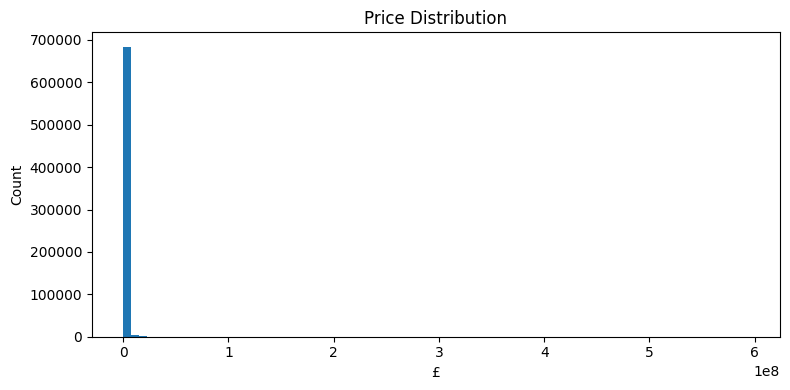

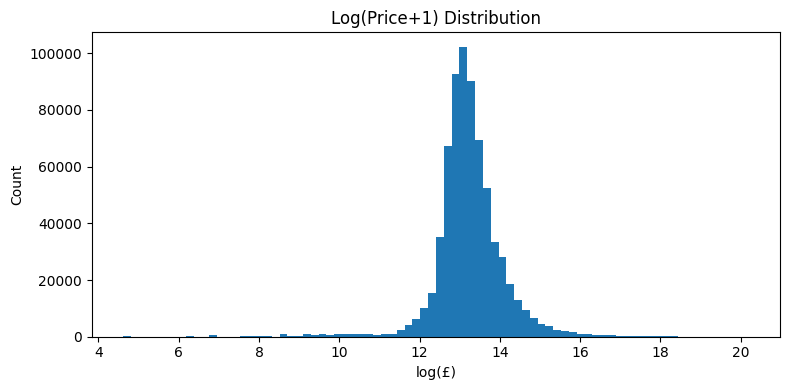

In [ ]:
x = dataset['price_paid']

plt.figure(figsize=(8,4))
plt.hist(x, bins=80)
plt.title("Price Distribution")
plt.xlabel("£"); plt.ylabel("Count"); plt.tight_layout(); plt.show()

plt.figure(figsize=(8,4))
plt.hist(np.log1p(x), bins=80)
plt.title("Log(Price+1) Distribution")
plt.xlabel("log(£)"); plt.ylabel("Count"); plt.tight_layout(); plt.show()

The second plot ("Median Price by Month") shows a stable housing price trend from 2015 to 2024, with median prices typically ranging between £400k and £600k.
However, there is a clear outlier at the end of the time series (2025), where the median price spikes to around £1.8 million.
This spike is likely due to very limited number of transactions recorded in 2025, possibly involving only high-end properties, leading to a distorted median value.

The third plot ("Transactions per Month") supports this interpretation — transaction volume sharply drops in 2025, confirming that the data point represents a small sample rather than a true market surge.

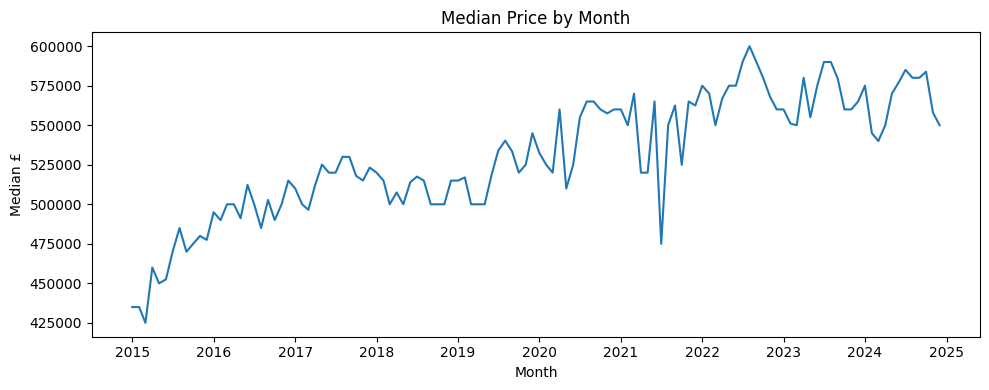

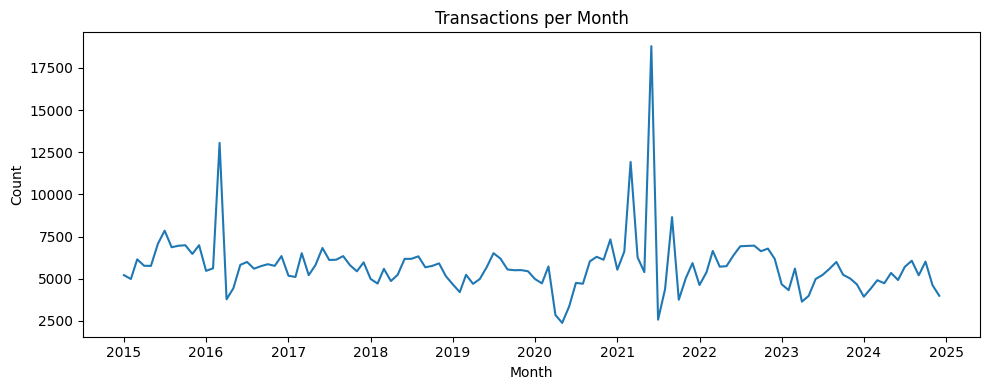

In [ ]:
s = dataset[['date','price_paid']].dropna().copy()
s['month'] = s['date'].dt.to_period('M').dt.to_timestamp()

monthly = s.groupby('month').agg(median_price=('price_paid','median'),
                                 volume=('price_paid','size')).reset_index()

plt.figure(figsize=(10,4))
plt.plot(monthly['month'], monthly['median_price'])
plt.title("Median Price by Month"); plt.xlabel("Month"); plt.ylabel("Median £")
plt.tight_layout(); plt.show()

plt.figure(figsize=(10,4))
plt.plot(monthly['month'], monthly['volume'])
plt.title("Transactions per Month"); plt.xlabel("Month"); plt.ylabel("Count")
plt.tight_layout(); plt.show()


In [ ]:
dataset['year'] = dataset['date'].dt.year
print(df['year'].value_counts().sort_index())

year
2015    77225
2016    73773
2017    71039
2018    67121
2019    64664
2020    59617
2021    85220
2022    75240
2023    59107
2024    60049
Name: count, dtype: int64


There is a bias at 2025

In [ ]:
print(dataset['date'].min(), dataset['date'].max())


2015-01-01 00:00:00 2024-12-31 00:00:00


In [ ]:
dataset = dataset[dataset['date'].dt.year.between(1995, 2024)]


Median Price by Year

The median property price in the UK shows a clear upward trend from 2015 to 2022, rising from around £460k to nearly £580k. Prices slightly declined after 2022, suggesting a mild market correction or stabilization.

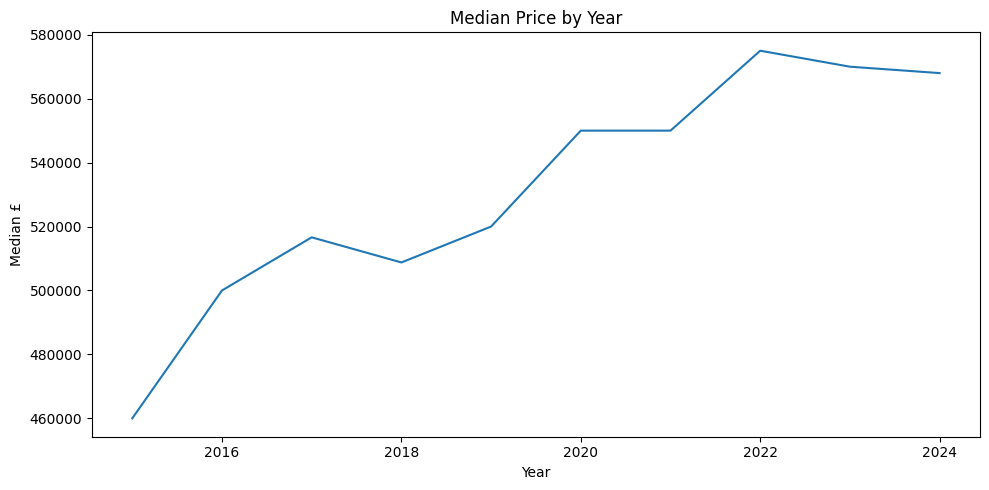

In [ ]:
g = dataset.groupby(['year'])['price_paid'].median()
g.plot(figsize=(10,5), title="Median Price by Year")
plt.xlabel("Year"); plt.ylabel("Median £"); plt.tight_layout(); plt.show()

Median Price by Month

Monthly data show the same long-term growth pattern with short-term fluctuations. Some dips or peaks correspond to changes in market activity or seasonal effects (e.g., fewer transactions in winter months).

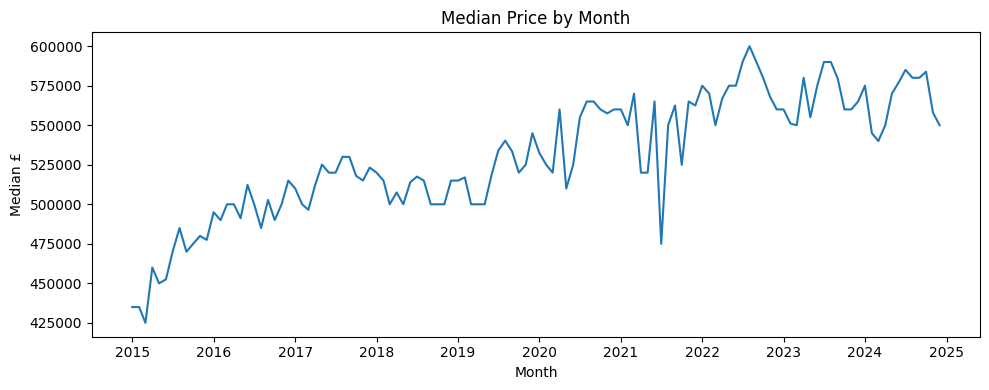

In [ ]:
m = dataset.copy()

m['month'] = m['date'].dt.to_period('M').dt.to_timestamp()

monthly = (
    m.groupby('month')['price_paid']
      .median()
      .reset_index()
)

plt.figure(figsize=(10,4))
plt.plot(monthly['month'], monthly['price_paid'])
plt.title("Median Price by Month")
plt.xlabel("Month")
plt.ylabel("Median £")
plt.tight_layout()
plt.show()


Median Price by Month and Year (Heatmap)

The heatmap reveals a gradual increase in prices over time and some seasonality — prices are typically higher in the spring and summer, and lower in early or late months of each year.

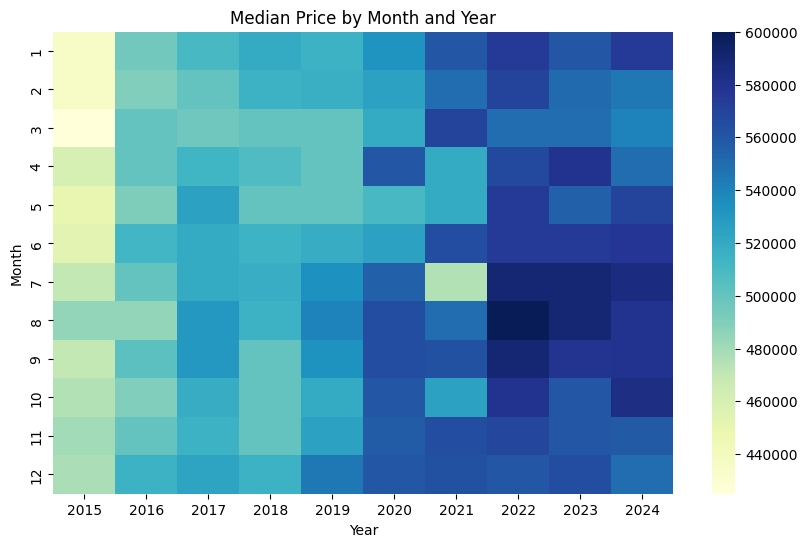

In [ ]:
import seaborn as sns

m = dataset.copy()
m['year'] = m['date'].dt.year
m['month_num'] = m['date'].dt.month

monthly_grouped = (
    m.groupby(['year', 'month_num'])['price_paid']
      .median()
      .unstack(level=0)
)

plt.figure(figsize=(10,6))
sns.heatmap(monthly_grouped, cmap="YlGnBu", annot=False)
plt.title("Median Price by Month and Year")
plt.xlabel("Year")
plt.ylabel("Month")
plt.show()

Median Price by Year × Property Type

Detached houses (D) consistently have the highest median prices, exceeding £1.4 million in recent years.
Semi-detached (S) and terraced houses (T) follow with moderate prices, both showing a gradual upward trend over time.
Flats (F) remain the most affordable property type, with prices rising slightly but staying below £500k.
Other properties (O) fluctuate more, likely due to smaller sample sizes or varying categories within this group.

Overall, all property types show long-term price growth, though the rate of increase is steeper for detached and semi-detached homes.

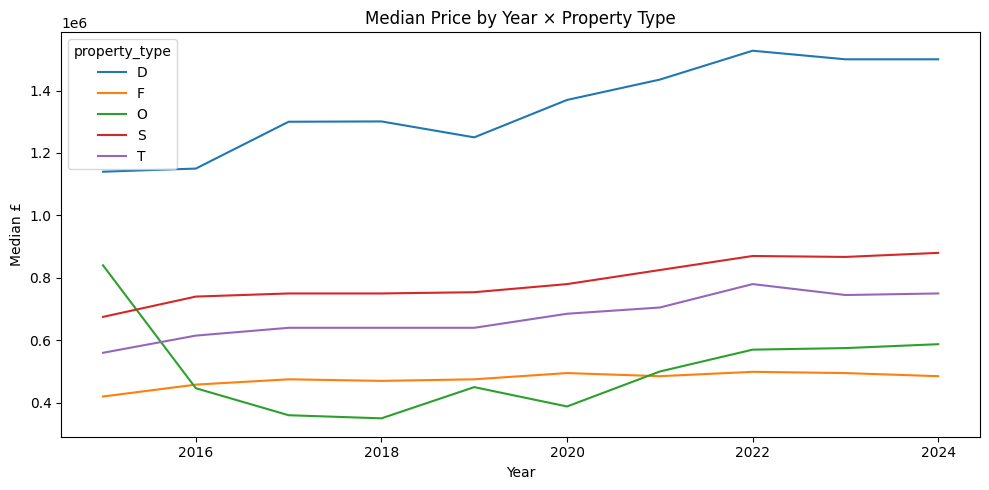

In [ ]:
pivot = dataset.pivot_table(index='year', columns='property_type', values='price_paid', aggfunc='median')
pivot.plot(figsize=(10,5), title="Median Price by Year × Property Type")
plt.xlabel("Year"); plt.ylabel("Median £"); plt.tight_layout(); plt.show()


Median Price per Year: New Build vs Not

New builds (Y) are consistently more expensive than non-new (N) each year.

Both series trend upward from 2015–2022; new builds jump sharply in 2022, then ease slightly.

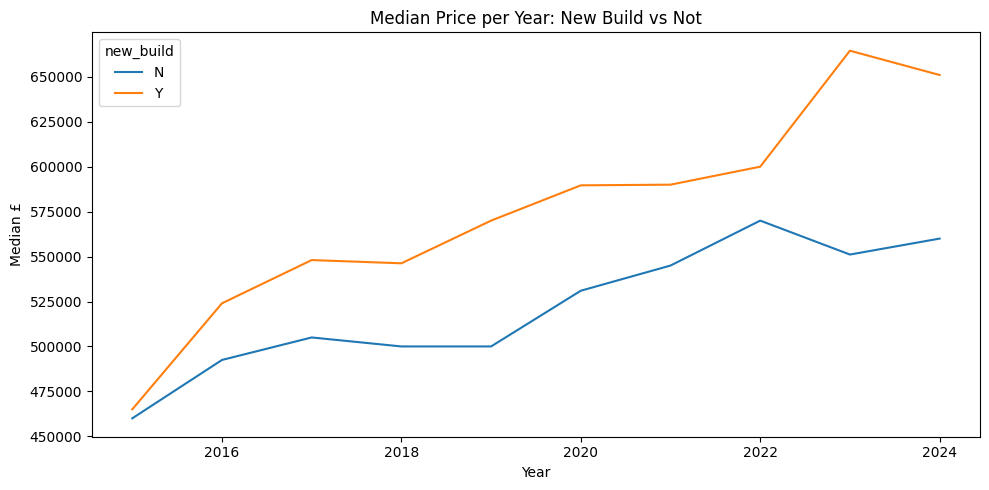

In [ ]:
price_compare = dataset.groupby(['year', 'new_build'])['price_paid'].median().unstack(fill_value=0)

price_compare.plot(figsize=(10,5), title='Median Price per Year: New Build vs Not')
plt.xlabel("Year")
plt.ylabel("Median £")
plt.tight_layout()
plt.show()


Transactions per Year: New Build vs Not

Non-new (N) dominate volume and show a pandemic dip then rebound around 2021–22.

New-build (Y) volumes decline steadily, especially after 2021—consistent with tighter supply or slower completions.

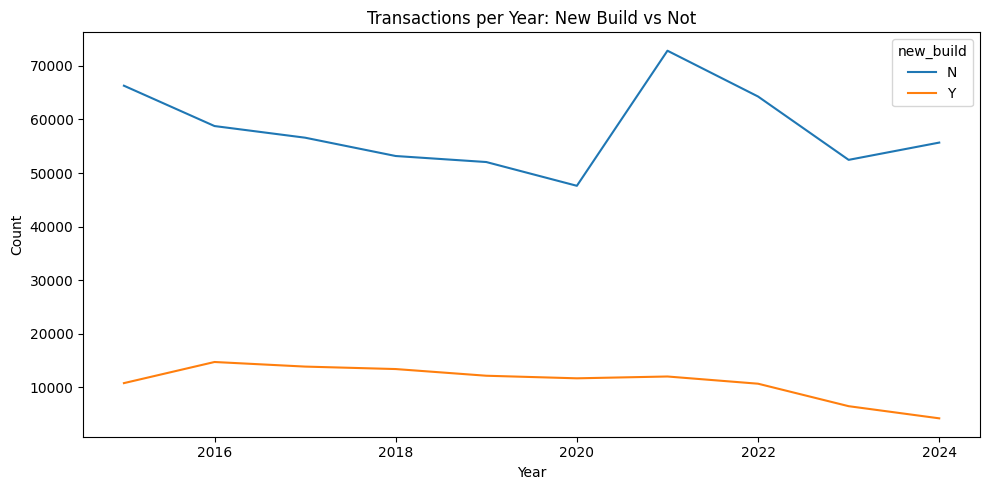

In [ ]:
cnt = dataset.groupby(['year','new_build']).size().unstack(fill_value=0)
cnt.plot(figsize=(10,5), title="Transactions per Year: New Build vs Not")
plt.xlabel("Year"); plt.ylabel("Count"); plt.tight_layout(); plt.show()


Compares the median price of properties by tenure type ("F" and "L") from 2015 to 2024. The median price for "F" type properties is significantly higher and shows a consistent upward trend over the period, while the price for "L" type properties remains relatively flat and at a much lower level.

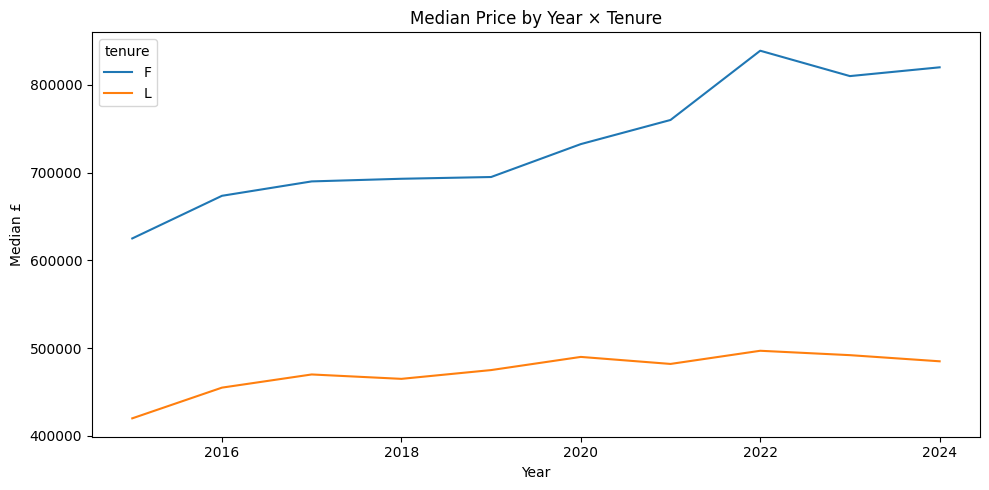

In [ ]:
pivot = dataset.pivot_table(index='year', columns='tenure', values='price_paid', aggfunc='median')
pivot.plot(figsize=(10,5), title="Median Price by Year × Tenure")
plt.xlabel("Year"); plt.ylabel("Median £"); plt.tight_layout(); plt.show()


/tmp/ipython-input-2058817196.py:4: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(groups, labels=df['transaction_category'].dropna().unique(), showfliers=False)


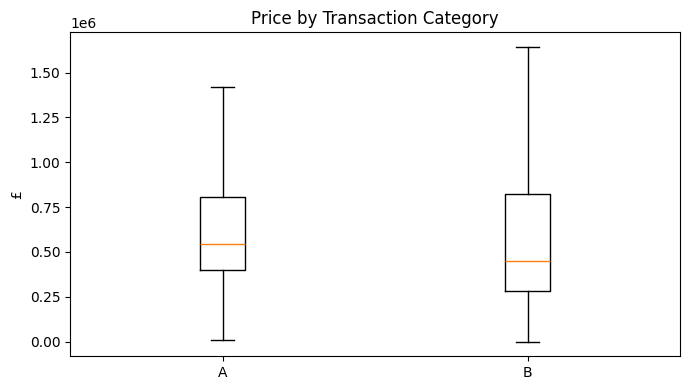

In [ ]:
groups = [dataset.loc[df['transaction_category']==t, 'price_paid'].dropna()
          for t in df['transaction_category'].dropna().unique()]
plt.figure(figsize=(7,4))
plt.boxplot(groups, labels=df['transaction_category'].dropna().unique(), showfliers=False)
plt.title("Price by Transaction Category"); plt.ylabel("£")
plt.tight_layout(); plt.show()


We are currently refining the dataset by removing rows from districts that fall outside of our London-focused scope, such as "CITY OF BRISTOL" and "EPPING FOREST". It is kindd of bias

In [ ]:
dataset['district'].value_counts()

,count
district,
WANDSWORTH,60635
LAMBETH,45020
TOWER HAMLETS,44784
SOUTHWARK,39458
GREENWICH,39004
LEWISHAM,38545
BARNET,37980
CITY OF WESTMINSTER,36089
WALTHAM FOREST,34257


In [ ]:
districts_to_drop = ['CITY OF BRISTOL', 'EPPING FOREST', 'HARLOW']

In [ ]:
dataset = dataset[~dataset['district'].isin(districts_to_drop)]

In [ ]:
dataset['district'].value_counts()

,count
district,
WANDSWORTH,60635
LAMBETH,45020
TOWER HAMLETS,44784
SOUTHWARK,39458
GREENWICH,39004
LEWISHAM,38545
BARNET,37980
CITY OF WESTMINSTER,36089
WALTHAM FOREST,34257
